In [58]:
%load_ext autoreload
%autoreload 2

# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import sys
from torchvision import datasets, transforms
from tqdm import tqdm
from scipy.spatial.distance import euclidean

# import the project root
sys.path.insert(0, '../..')
from src.covertree import CoverTree 
from src.dyadictree import DyadicTree
from src.wavelettree import WaveletTree
from src.utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
def load_dataset(flatten=False):
    num_points = 100
    transform = transforms.Compose([
        transforms.ToTensor()
    ])

    cifar10_train = datasets.MNIST(root='../../datasets', train=True, download=True, transform=transform)
    X = np.stack([np.array(img[0].numpy()) for img in cifar10_train][:num_points])  # shape: (1000, 3, 32, 32)

    original_shape = X.shape
    if flatten:
        X = X.reshape(X.shape[0], -1)
    # print(X.shape)
    return X, original_shape    

X, original_shape = load_dataset(flatten=True)
p_n_points = X.shape[0]
print("X shape: %s" % str(X.shape))
print(p_n_points)


X shape: (100, 784)
100


In [60]:
python_covertree =  CoverTree(X, euclidean, leafsize=1)
mydiadic_tree    =  DyadicTree(python_covertree)

In [61]:
# print(mydiadic_tree.height)# mydiadic_tree.grow_tree()

In [62]:
# wavelet_tree.j_k_to_wavelet_node

In [63]:
# mydiadic_tree.plot_tree()

In [64]:
mydiadic_tree.grow_tree()


In [65]:
mydiadic_tree.grow_tree()

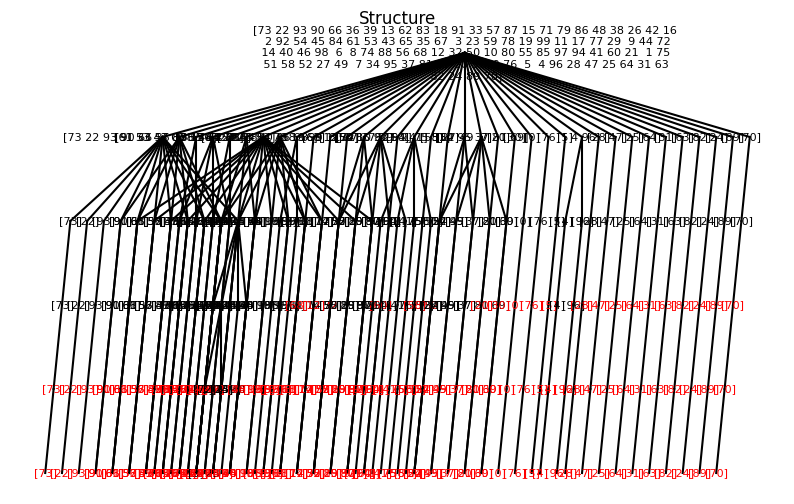

In [66]:
mydiadic_tree.plot_tree()

In [67]:
# mydiadic_tree.idx_to_leaf_node[19]
from scipy.spatial.distance import euclidean
wavelet_tree = WaveletTree(mydiadic_tree, X, 0, X.shape[-1], inverse=True,
                            thresholds=0.0) # inverse means data in (n,d) formatdj

info: computing basis and wavelets for dyadic tree of height 6
info: this may take time..
info: making wavelet tree
info: making wavelets


In [68]:
# add some small noise to X

# X += np.random.normal(0, 0.01, X.shape)*10
gmra_q_coeff, leaves_j_k  = wavelet_tree.fgwt(X)

In [69]:
x_recon = wavelet_tree.igwt(gmra_q_coeff, leaves_j_k, X.shape)

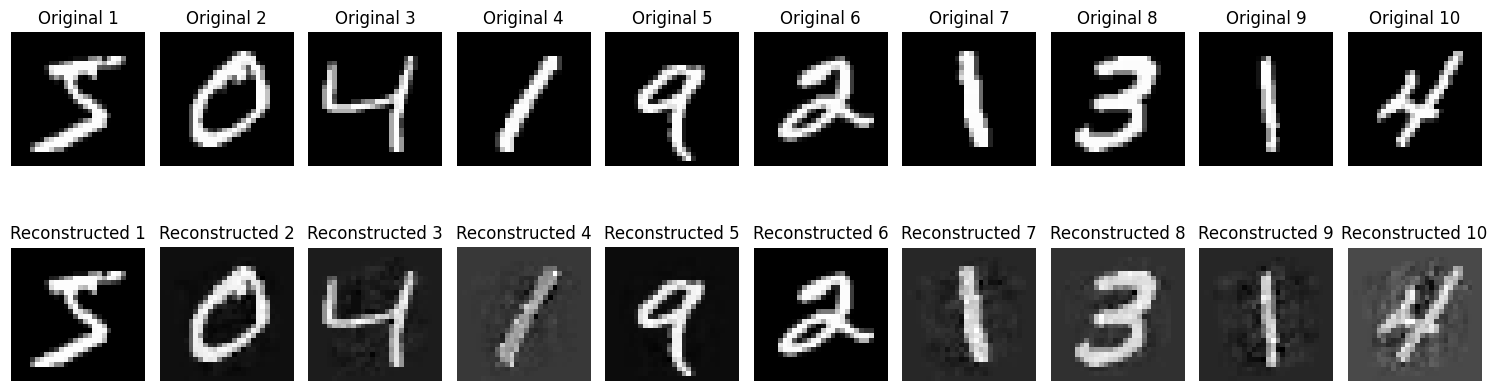

In [70]:
# plot x & x_recon for mnist in 2 row, take 5 images, remember to reshape to image

n_images = 10
fig, axs = plt.subplots(2, n_images, figsize=(15, 5))
for i in range(n_images):
    axs[0, i].imshow(X[i].reshape(original_shape[2:]), cmap='gray')
    axs[0, i].axis('off')
    axs[0, i].set_title(f'Original {i+1}')

    axs[1, i].imshow(x_recon[i].reshape(original_shape[2:]), cmap='gray')
    axs[1, i].axis('off')
    axs[1, i].set_title(f'Reconstructed {i+1}')
plt.tight_layout()
plt.show()

In [71]:
# reconstruction error:
reconstruction_error = np.linalg.norm(X - x_recon, axis=1)
print("Reconstruction error (first 10):", reconstruction_error[:10])
print("Mean reconstruction error:", np.mean(reconstruction_error))

# snr signal to noise ratio
snr = 10 * np.log10(np.sum(X**2) / np.sum((X - x_recon)**2))
print("SNR:", snr)

Reconstruction error (first 10): [1.23138723e-06 5.08315376e-01 8.60821350e-01 3.36801552e+00
 2.47028286e-01 1.33437070e-06 1.19668754e+00 1.05434234e+00
 1.49644800e+00 3.18084230e+00]
Mean reconstruction error: 1.0109433462131328
SNR: 16.99633937493965
